In [1]:
import pandas as pd

# Analisis básico

En esta notebook se hace un análisis muy básico de la data

No tiene que hacer nada más que entenderla

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5659,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,10500.0,4.978811
5660,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,1220.0,5.913640
5661,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,1450.0,5.838632
5662,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,28980.0,4.537902


In [4]:
df['molecule_chembl_id'].unique().shape

(5664,)

In [5]:
# Rango dinámico del standar value
df['standard_value'].max(), df['standard_value'].min()

(5888436553555884.0, 0.0)

# Histograma de longitudes de los smiles

In [6]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

<AxesSubplot:>

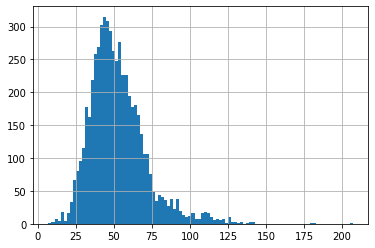

In [8]:
df['canonical_len'].hist(bins=100)

In [9]:
# Max y min 
max_sequence_len = df['canonical_len'].max()
max_sequence_len, df['canonical_len'].min()

(207, 7)

In [10]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [11]:
# Ejemplo de molécula más larga
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [12]:
# Ejemplo de molécula más corta
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

# Histograma de caracteres

In [13]:
from collections import Counter

In [14]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [15]:
vocab_hist = dict(Counter(text))

In [16]:
vocab_hist

{'C': 62301,
 'O': 14009,
 'c': 72788,
 '1': 16670,
 'n': 4542,
 '(': 23475,
 '-': 2147,
 '2': 13334,
 '3': 8201,
 ')': 23475,
 '=': 8658,
 'o': 779,
 'N': 10359,
 'l': 1548,
 'S': 628,
 'F': 1162,
 '[': 6001,
 '@': 4527,
 'H': 2456,
 ']': 6001,
 '/': 1817,
 '\\': 373,
 '+': 1297,
 '.': 1317,
 'B': 706,
 'r': 682,
 '4': 3420,
 '#': 366,
 'I': 109,
 's': 270,
 '5': 972,
 '6': 230,
 'P': 34,
 'a': 1,
 '7': 18,
 '8': 6,
 'e': 35,
 'i': 2}